# Data Analysis and Visualisation
## 1. Import Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from scipy import signal
import os

## 2. Helper Functions
### 2.1 Data Acquisition Function

In [2]:
def read_csv(path): 
    result = None
    if path.endswith('.csv'): 
        result = pd.read_csv(path)
    return result

### 2.2 Plotting Functions

In [3]:
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}

axis_listing = ['x', 'y', 'z']

def plot_in_3d(df, t = ''):   
    """
    Plots the summation of x-, y-, and z-axes in 3D space

    Parameters
    -----
    df: Pandas dataframe
        dataframe extracted from csv    
    """  
    # Initialize figure and 3d projection
    fig = plt.figure(figsize = [10, 10])
    ax = fig.add_subplot(111, projection = '3d')
    # Label axes
    ax.set(xlabel = df.columns[3], ylabel = df.columns[4], zlabel = df.columns[5], title = t) 
    
    # Get datapoints
    x = df.iloc[:, 3]
    y = df.iloc[:, 4]
    z = df.iloc[:, 5]
    
    # Plot
    ax.plot(x, y, z)
    
    # Save Plots
    cnt = 0
    while os.path.exists('{}{:d}.png'.format(t, cnt)):
        cnt += 1
    plt.savefig('{}{:d}.png'.format(t, cnt))
    
def plot_time(df, var = 'x', t = ''):
    """
    Plots the desired parameter against time
    
    Parameters:
    -----
    df: Pandas dataframe
        The pandas dataframe containing the data from the acceleromere
    var: str
        The axis 'x', 'y', 'z' to be plotted; defaults to 'x'
    """
    # Check that var is 'x', 'y', or 'z'
    # Defaults to 'x' if not used
    if var not in axis_listing:
        var = 'x'
    
    # Get data
    time = df.iloc[:, 2]
    data = df.iloc[:, df_column_mapping[var]]
    
    # Initialize figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Label axes
    ax.set(xlabel = df.columns[2], ylabel = df.columns[df_column_mapping[var]], title = t) 
    # Customize the major grid
    ax.grid(b=True, which='both')
    
    # Plot
    ax.plot(time, data)
    
def plot_time_3_axes(data, t = ''):
    """
    Plots all axes into a single plot in the time domain
    
    Parameters:
    -----
    df: Pandas dataframe
        The pandas dataframe containing the data from the acceleromere
    t: title
    """
    # Create mapping lists to enumerate over
    select_data=[3, 4, 5]
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel = 'Time (s)', ylabel = 'Acceleration (g)', title = t) 
    ax.grid(b=True, which='both')

    # Plot while enumerating 
    for idx, data in enumerate(select_data): 
        ax.plot(df.iloc[:, 2], df.iloc[:, data], color_map[idx], label=labels[idx])
        
    ax.legend()
    
    # Save Plots
    cnt = 0
    while os.path.exists('{}{:d}.png'.format(t, cnt)):
        cnt += 1
    plt.savefig('{}{:d}.png'.format(t, cnt))
    
def plot_frequency(data, fs, t = ''):
    """
    Plots all axes into a single plot in the frequency domain
    
    Parameters:
    -----
    df: Pandas dataframe
        The pandas dataframe containing the data from the acceleromere
    fs: Sampling frequency (512 Hz by default)
    t: title
    """
    # Create mapping lists
    select_data=[3, 4, 5]
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    lgth, num_signal=data.shape
    fqy = np.zeros([lgth, num_signal])
    
    # Perform FFT on data and store in matrix
    for idx, i in enumerate(select_data): 
        fqy[:,idx] = np.abs(fft(data.iloc[:, i]))

    index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = t) # xlim = [0, fs/2] 
    ax.grid(b=True, which='both')
    
    # Plot 
    for i in range(3):
        ax.plot(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])

    ax.legend()

    # Save Plots
    cnt = 0
    while os.path.exists('{}{:d}.png'.format(t, cnt)):
        cnt += 1
    plt.savefig('{}{:d}.png'.format(t, cnt))

def plot_frequency_recursive(data, fs, t = ''):
    """
    Plots all axes into a single plot in the frequency domain
    
    Parameters:
    -----
    df: Pandas dataframe
        The pandas dataframe containing the data from the acceleromere
    fs: Sampling frequency (512 Hz by default)
    t: title
    """
    # Create mapping lists
    labels=['x','y','z']
    color_map=['r', 'g', 'b']
    
    lgth, num_signal=data.shape
    fqy = np.zeros([lgth, num_signal])
    
    # Perform FFT on data and store in matrix
    for i in range(num_signal): 
        fqy[:,i] = np.abs(fft(data[:, i]))

    index = np.arange(int(lgth/2))/(int(lgth/2)/(fs/2))
    
    # Customise plots
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Acceleration (g)', title = t) # xlim = [0, fs/2] 
    ax.grid(b=True, which='both')
    
    # Plot 
    for i in range(3):
        ax.plot(index, fqy[0:int(lgth/2),i], color_map[i], label=labels[i])

    ax.legend()

### 2.3 Filter Functions

In [4]:
def median_filter(data, f_size):
    select_data=[3, 4, 5]
    lgth, num_signal=data.shape
    f_data=np.zeros([lgth, num_signal])
    for idx, i in enumerate(select_data):
        f_data[:,idx]=signal.medfilt(data.iloc[:,i], f_size)
    return f_data

def freq_filter(data, f_size, cutoff):
    select_data=[3, 4, 5]
    lgth, num_signal=data.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for idx, i in enumerate(select_data): 
        f_data[:,idx]=signal.convolve(data.iloc[:,i], lpf, mode='same')
    return f_data

def freq_filter_recursive(data, f_size, cutoff):
    lgth, num_signal=data.shape
    f_data=np.zeros([lgth, num_signal])
    lpf=signal.firwin(f_size, cutoff, window='hamming')
    for i in range(num_signal):
        f_data[:,i]=signal.convolve(data[:,i], lpf, mode='same')
    return f_data

## 2.4 Global Parameters

In [5]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
import matplotlib.pylab as pylab
params = {'lines.linewidth' : 1,
          'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

# Frequency presets
fs = 512 # sampling frequency
cutoff = 10 # cut-off frequency

## 3. Read Data and Plot

['pro-sup-lvl1-try3_S4_2019-11-01T20.44.29.452_EB54418CDA46_Accelerometer_1.4.5.csv', '.DS_Store', 'data-analysis.ipynb', 'pro-sup-lvl1-try1_S4_2019-11-01T20.31.16.187_EB54418CDA46_Accelerometer_1.4.5.csv', 'pro-sup-lvl1-try1_S4_2019-11-01T20.31.16.187_EB54418CDA46_Gyroscope_1.4.5.csv', 'pro-sup-lvl1-try3_S4_2019-11-01T20.44.29.452_EB54418CDA46_Gyroscope_1.4.5.csv', 'pro-sup-lvl1-try2_S4_2019-11-01T20.33.42.952_EB54418CDA46_Gyroscope_1.4.5.csv', '.ipynb_checkpoints', 'pro-sup-lvl1-try2_S4_2019-11-01T20.33.42.952_EB54418CDA46_Accelerometer_1.4.5.csv']


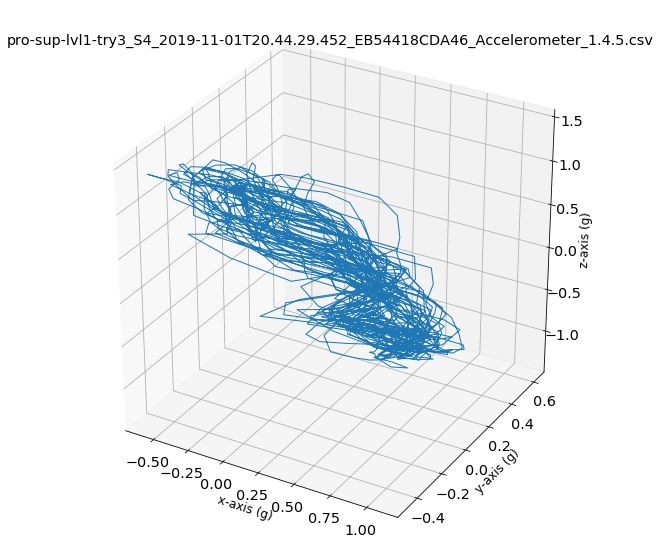

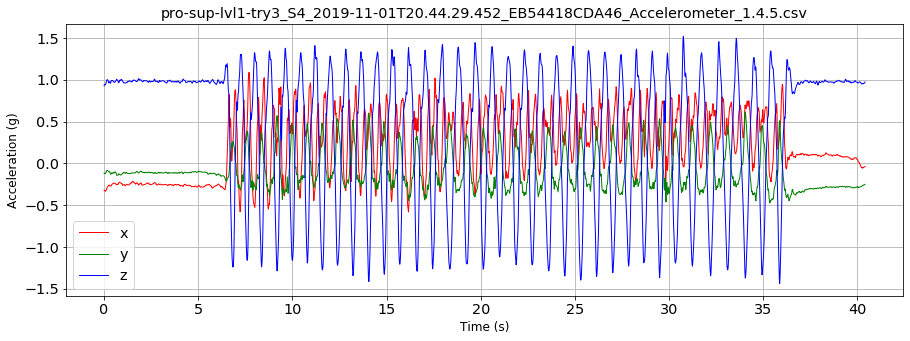

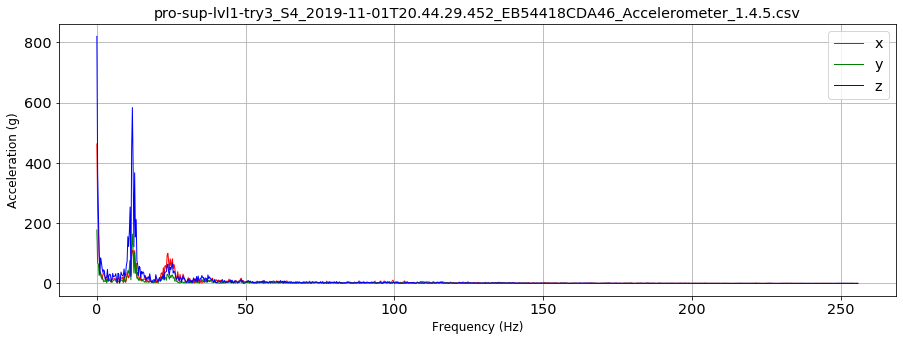

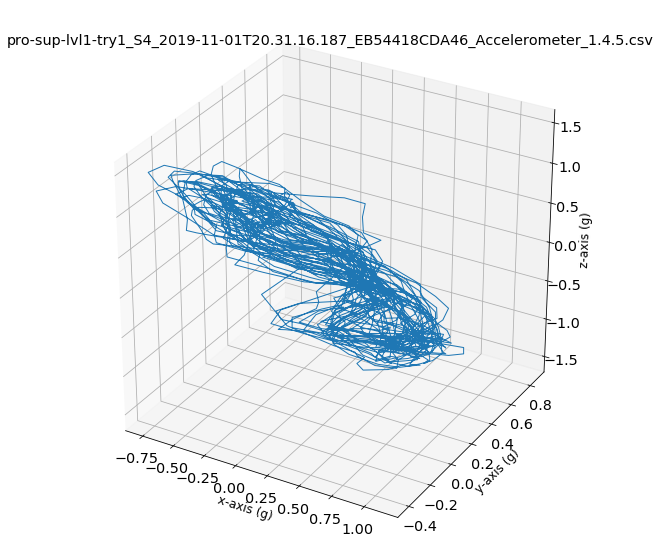

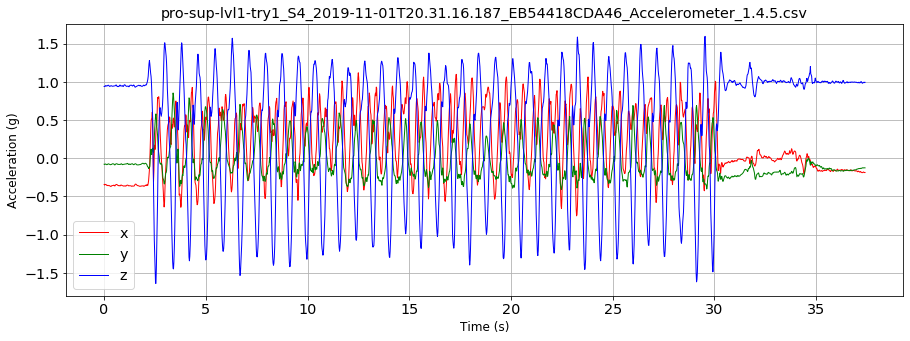

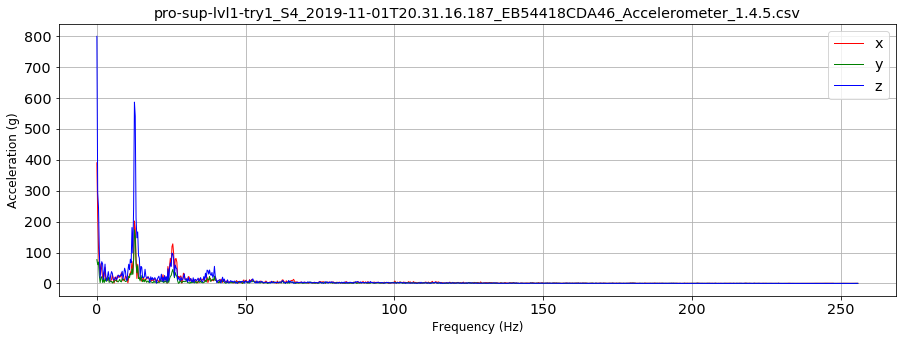

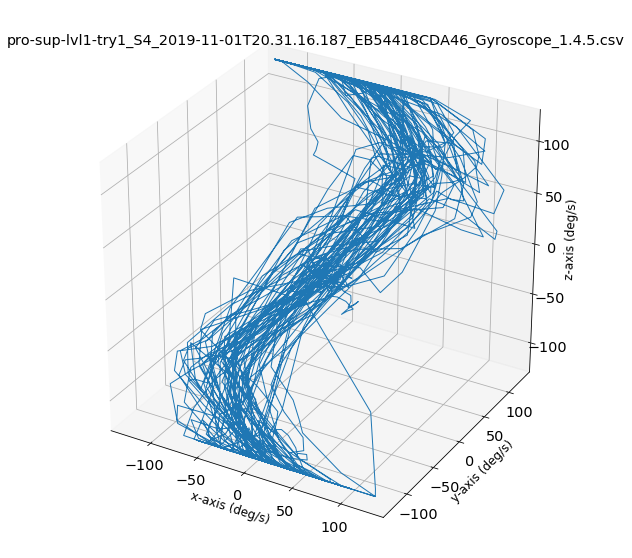

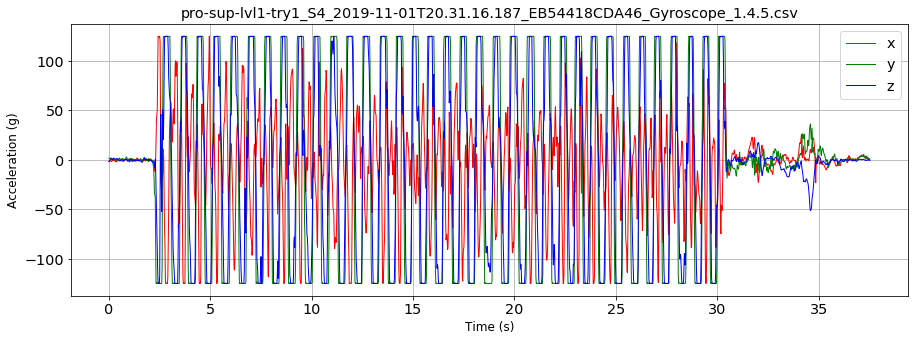

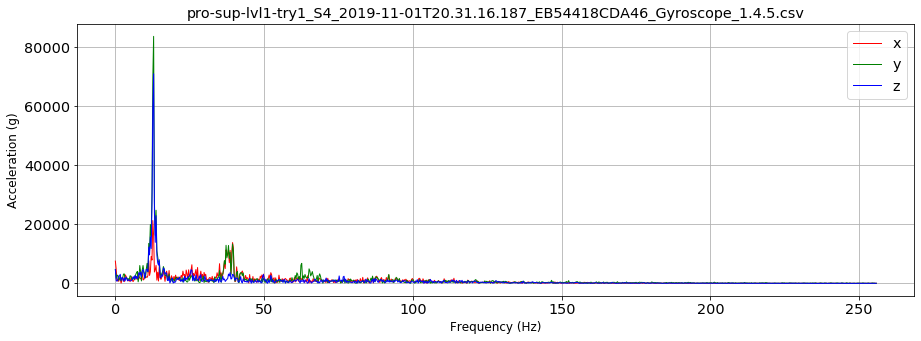

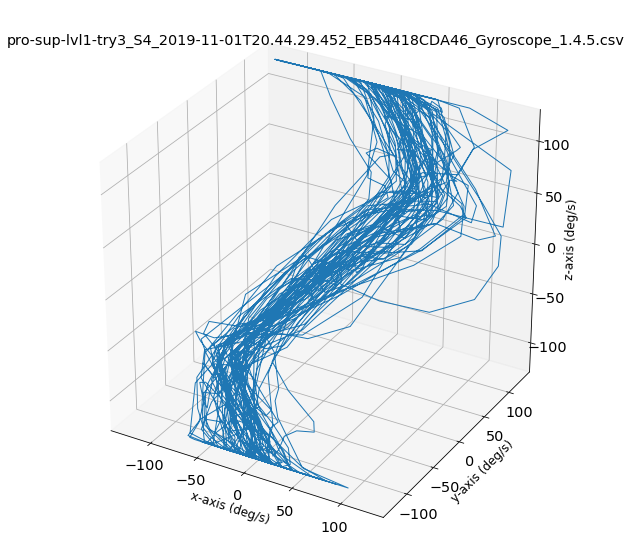

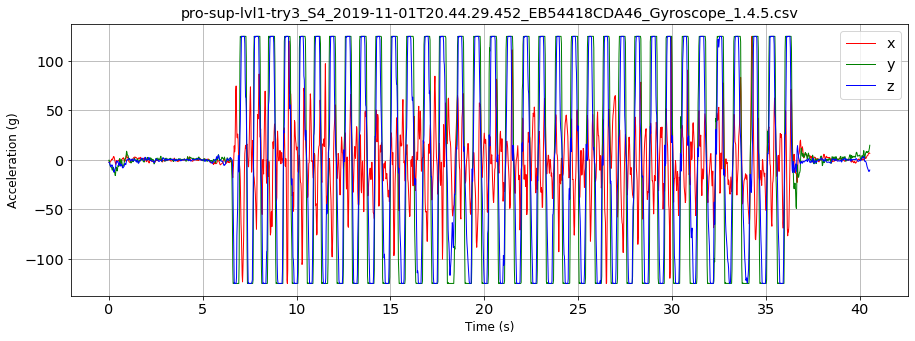

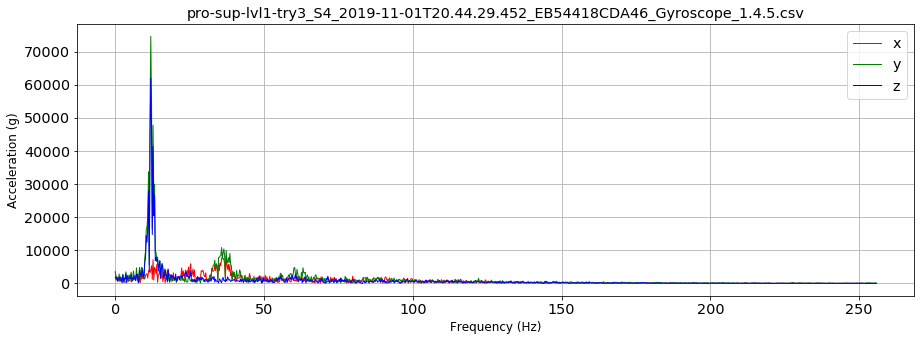

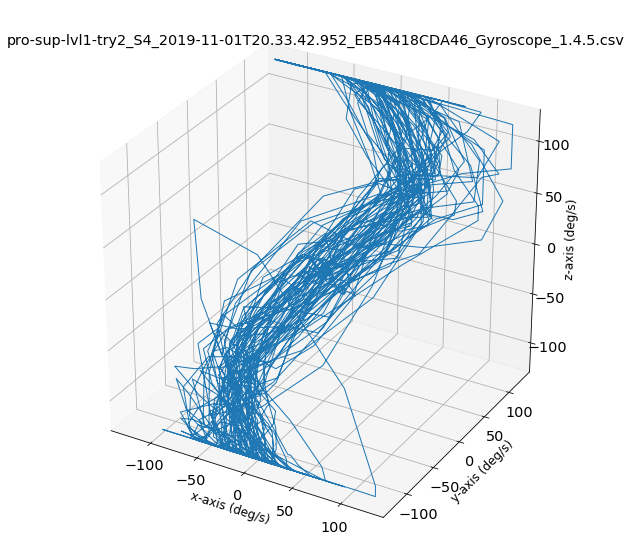

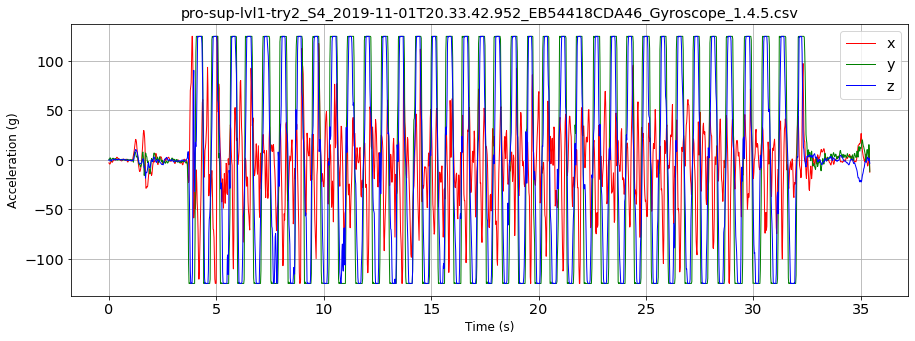

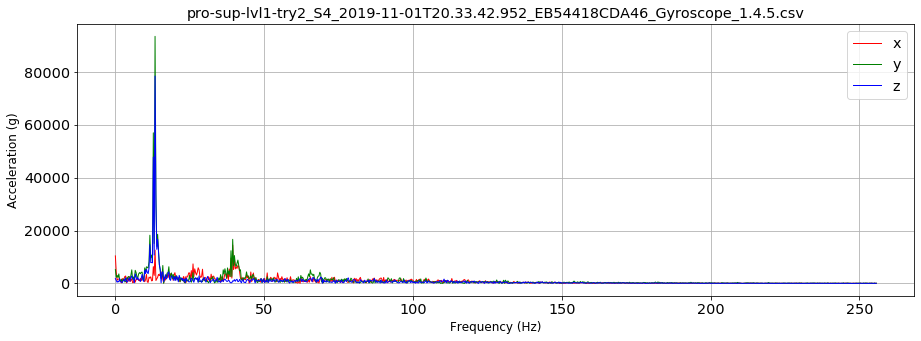

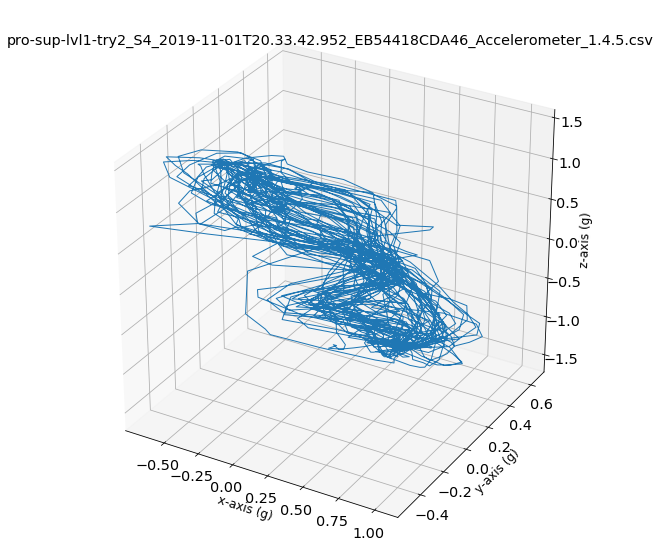

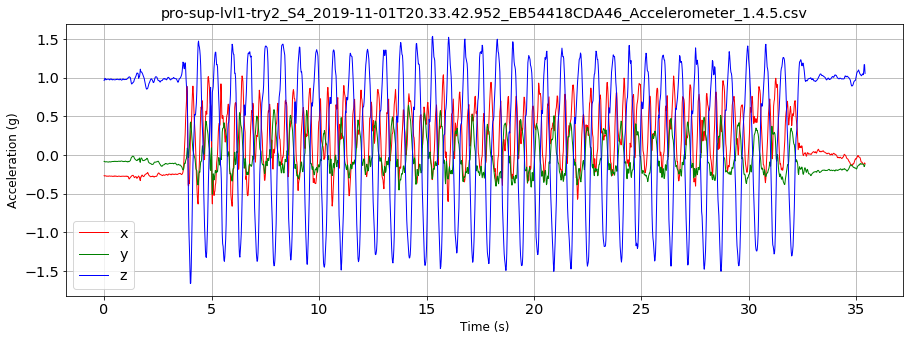

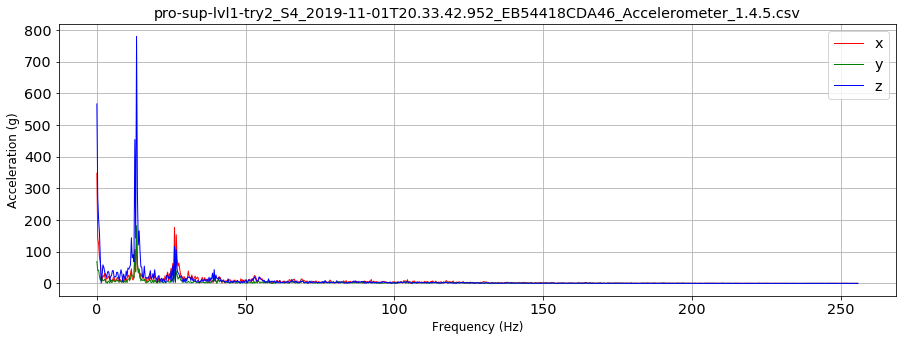

In [6]:
directory = os.listdir()
print(directory)

for file in directory:
    df = read_csv(file)
    
    if df is None:
        continue
    
    pylab.rcParams.update(params)
    
    plot_in_3d(df, t = file)
    plot_time_3_axes(df, t = file)
    plot_frequency(df, fs, t = file)
    
#     # Filtered signals plots
#     median_data=median_filter(df, 155)
#     lpf_data=freq_filter(df, 155, cutoff/fs)
#     comb_data=freq_filter_recursive(median_data, 155, cutoff/fs)
    
#     plot_time_3_axes(median_data, t = "Median Filter: " + file)
#     plot_time_3_axes(lpf_data, t = "LPF: " + file)
#     plot_time_3_axes(comb_data, t = "Combined Filter: " + file)
    
#     plot_frequency_recursive(median_data, fs, t = "Median Filter: " + file)
#     plot_frequency_recursive(lpf_data, fs, t = "LPF: " + file)
#     plot_frequency_recursive(comb_data, fs, t = "Combined Filter: " + file)

# Archive

In [7]:
df.describe()

,epoch (ms),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
count,1.766000e+03,1766.000000,1766.000000,1766.000000,1766.000000
mean,1.572640e+12,17.699835,0.197064,-0.039208,0.321064
std,1.022774e+04,10.227739,0.378075,0.220785,0.903076
min,1.572640e+12,0.000000,-0.663000,-0.508000,-1.661000
25%,1.572640e+12,8.850000,-0.126000,-0.200000,-0.457500
50%,1.572640e+12,17.700000,0.181500,-0.105500,0.670000
75%,1.572640e+12,26.550250,0.516000,0.077500,1.012000
max,1.572640e+12,35.400000,1.035000,0.643000,1.532000


In [8]:
# # Typical Matplotlib Plot Anatomy and Workflow
# # Import Matplotlib as plt
# import matplotlib.pyplot as plt

# # 1. Prepare data
# x = [1, 2, 3, 4]
# y = [10, 20, 25, 30]

# # 2. Create Plots
# fig = plt.figure(figsize = [15, 10])
# ax = fig.add_subplot(111)

# # 3. Plot
# ax.plot(x, y, color = 'lightblue', linewidth = 3)
# ax.scatter([2,4,6], [5,15,25], color = 'darkgreen', marker = '^')

# # 4. Customise Plot
# ax.set_xlim(1, 6.5)
# ax.set(xlabel = 'x-axis', ylabel = 'y-axis', title = 'y versus x graph') 
# ax.grid(b=True, which='both')

# # 5. Save Plot
# # plt.savefig('foo.png')

# # 6. Show Plot
# plt.show()

# """
# # Multiple Plots
# x = arange(5)
# y = np.exp(5)
# plt.figure(1)
# plt.plot(x, y)

# z = np.sin(x)
# plt.figure(2)
# plt.plot(x, z)

# w = np.cos(x)
# plt.figure(1) # Here's the part I need, but numbering starts at 1!
# plt.plot(x, w)
# """